# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
#import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

In [119]:

conda install -c districtdatalabs yellowbrick

Solving environment: ...working... 
  - conda-forge/noarch::decorator-4.4.2-py_0, conda-forge/noarch::networkx-2.5.1-pyhd8ed1ab_0
  - conda-forge/noarch::decorator-5.0.9-pyhd8ed1ab_0, conda-forge/noarch::networkx-2.3-py_0done

## Package Plan ##

  environment location: C:\Users\pinil\anaconda3

  added / updated specs:
    - yellowbrick


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2020.07-py38_0
  cython             conda-forge/win-64::cython-0.29.23-py38h885f38d_1
  decorator          conda-forge/noarch::decorator-4.4.2-py_0
  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.2-py38hbe5506b_1
  networkx           conda-forge/noarch::networkx-2.5.1-pyhd8ed1ab_0
  numpy-base         pkgs/main/win-64::numpy-base-1.18.5-py38hc3f5095_0
  pandas             conda-forge/win-64::pandas-1.2.4-py38h60cbd38_0
  pytest-runner      conda-forge/noarch::pytest-runner-5.3.1-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::pyt


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.07=py38_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda-navigator==1.9.12=py38_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/win-64::astropy==4.0.1.post1=py38he774522_1
  - defaults/win-64::bkcharts==0.2=py38_0
  - defaults/win-64::bokeh==2.1.1=py38_0
  - defaults/win-64::bottleneck==1.3.2=py38h2a96729_1
  - defaults/win-64::conda==4.10.0=py38haa95532_0
  - defaults/win-64::conda-build==3.18.11=py38_1
  - defaults/win-64::conda-package-handling==1.7.2=py38h76e460a_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::dask==2.20.0=py_0
  - defaults/win-64::h5py==2.10.0=py38h5e291fa_0
  - defaults/noarch::imageio==2.9.0=py_0
  - defaults/win-64::ipykernel==5.3.2=py38h5ca1d4c_0
  - defaults/win-64::ipython==7.16.1=py38h5ca1d4c_0
  - defaults/noarch::ipywidget

  certifi               pkgs/main::certifi-2020.6.20-py38_0 --> conda-forge::certifi-2021.5.30-py38haa244fe_0
  openssl              pkgs/main::openssl-1.1.1g-he774522_0 --> conda-forge::openssl-1.1.1k-h8ffe710_0

The following packages will be DOWNGRADED:

  anaconda                                   2020.07-py38_0 --> custom-py38_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed



  - defaults/win-64::mkl_fft==1.1.0=py38h45dec08_0
  - defaults/win-64::mkl_random==1.1.1=py38h47e9c7a_0
  - defaults/win-64::nbconvert==5.6.1=py38_0
  - defaults/noarch::nbformat==5.0.7=py_0
  - defaults/noarch::nltk==3.5=py_0
  - defaults/win-64::notebook==6.0.3=py38_0
  - defaults/win-64::numba==0.50.1=py38h47e9c7a_0
  - defaults/win-64::numexpr==2.7.1=py38h25d0782_0
  - defaults/win-64::numpy==1.18.5=py38h6530119_0
  - defaults/noarch::numpydoc==1.1.0=py_0
  - defaults/win-64::opencv==4.0.1=py38h2a7c758_0
  - defaults/win-64::patsy==0.5.1=py38_0
  - defaults/win-64::py-opencv==4.0.1=py38he44ac1e_0
  - defaults/win-64::pytables==3.6.1=py38ha5be198_0
  - defaults/win-64::pywavelets==1.1.1=py38he774522_0
  - defaults/noarch::qtconsole==4.7.5=py_0
  - defaults/win-64::scikit-image==0.16.2=py38h47e9c7a_0
  - defaults/win-64::scipy==1.5.0=py38h9439919_0
  - defaults/noarch::sphinx==3.1.2=py_0
  - defaults/win-64::spyder==4.1.4=py38_0
  - defaults/win-64::spyder-kernels==1.9.2=py38_0
  -

In [120]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [122]:
# Scaling data with the help of standard scaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [123]:
##Scale the data
from scipy.stats import zscore
mydata_z = X.apply(zscore)
mydata_z.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [124]:
km = KMeans(n_clusters=8, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.182


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [125]:
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.229


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [126]:
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(mydata_z)
# Calculate Silhoutte Score
score = silhouette_score(mydata_z, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.285


### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [127]:
#Elbow method using standard dispersion metric.
# Getting the sum of squared distances for different values of k
sum_of_squared_distances = []
n = range(1,9)
for i in n:
    km = KMeans(n_clusters=i)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

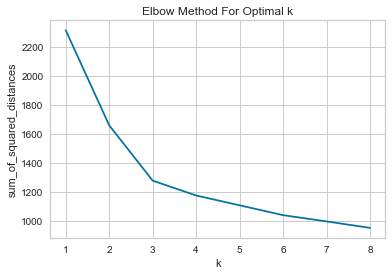

In [128]:
# Plotting the elbow plot
plt.plot(n, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow method using calinski_harabasz metric.

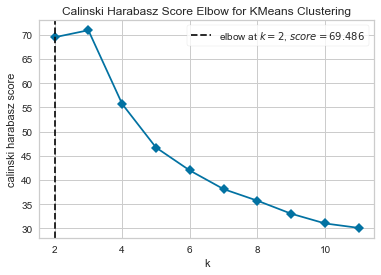

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [129]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(scaled_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From this plot, we can see that the optimal value of K is 2. The plot is drawn using Yellowbrick’s KElbowVisualizer method

Silhouette score

In [130]:
x = scaled_data.copy()

In [131]:
silhouette_vals = silhouette_samples(X,y_predict)
avg_score = np.mean(silhouette_vals)
avg_score

0.5711381937868844

For n_clusters = 2 The average silhouette_score is : 0.25931695553182554
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.25987462789190535
For n_clusters = 5 The average silhouette_score is : 0.19734439798042422
For n_clusters = 6 The average silhouette_score is : 0.13816940519863918
For n_clusters = 7 The average silhouette_score is : 0.1554351478858128
For n_clusters = 8 The average silhouette_score is : 0.15513848817709847
For n_clusters = 9 The average silhouette_score is : 0.14094937908128424
For n_clusters = 10 The average silhouette_score is : 0.14155556556279986


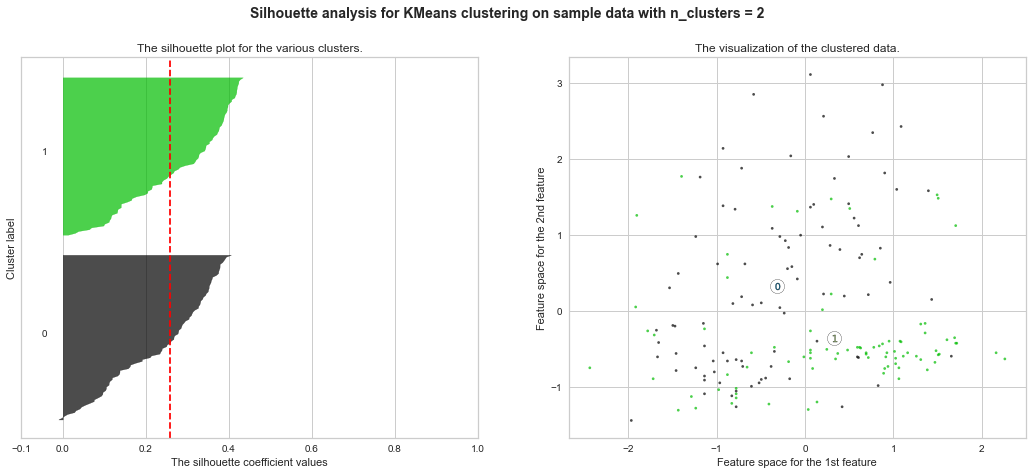

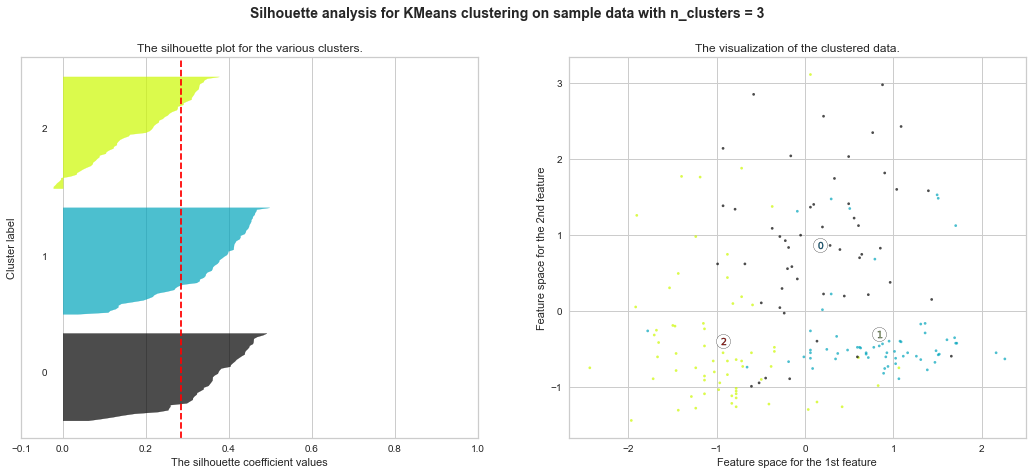

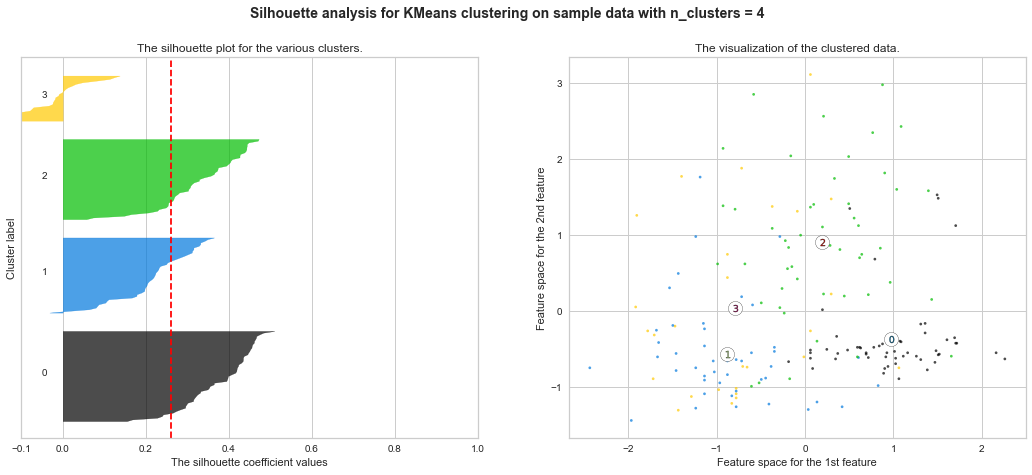

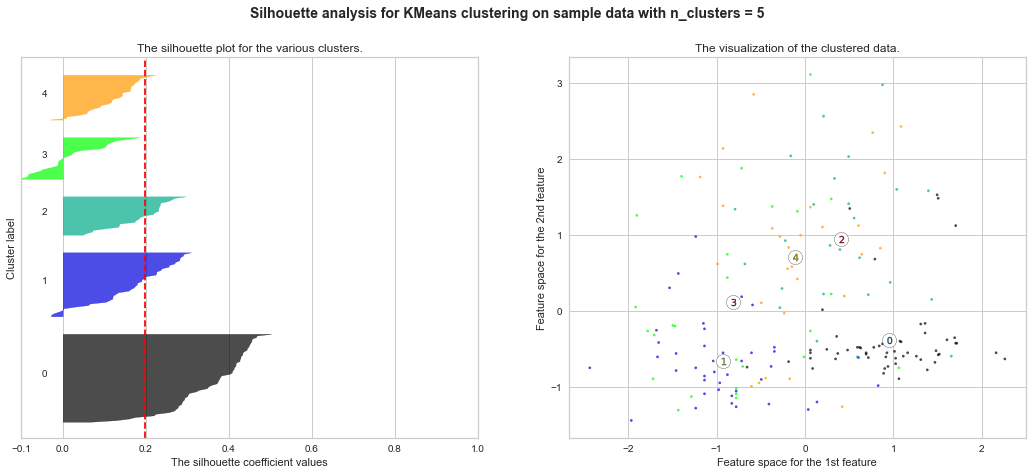

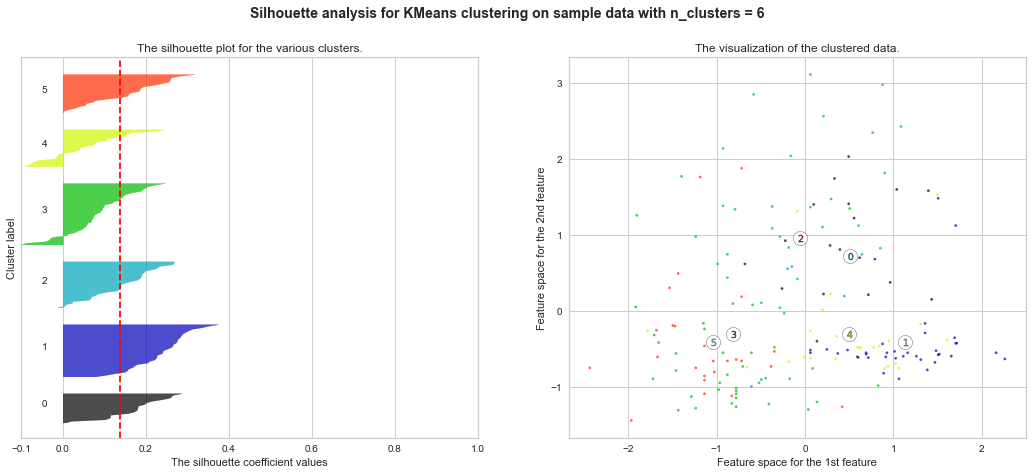

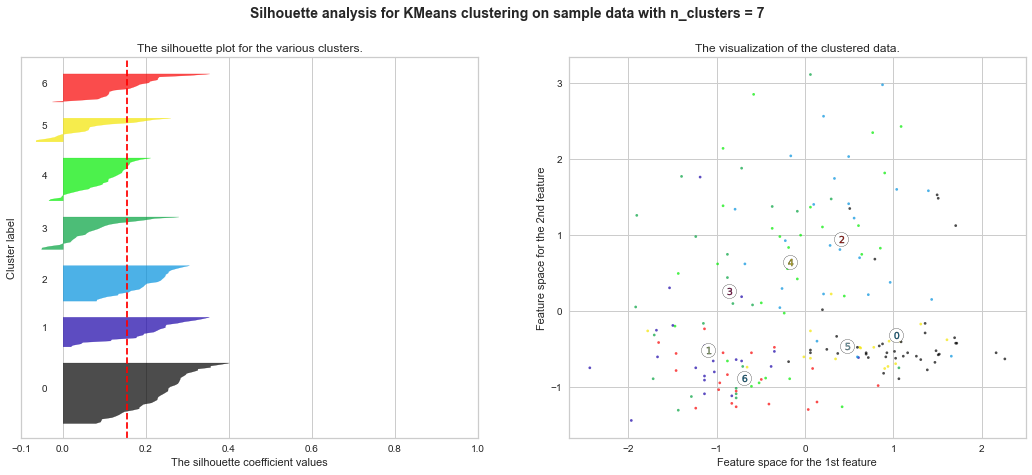

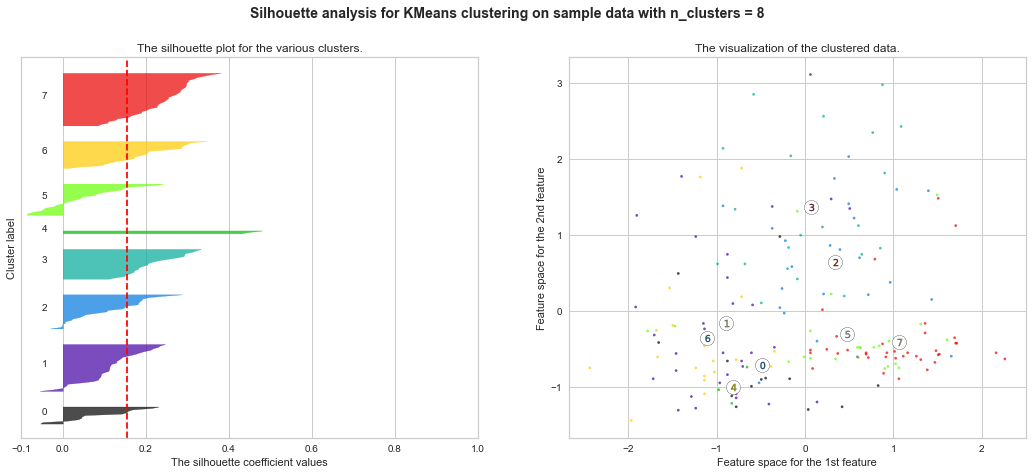

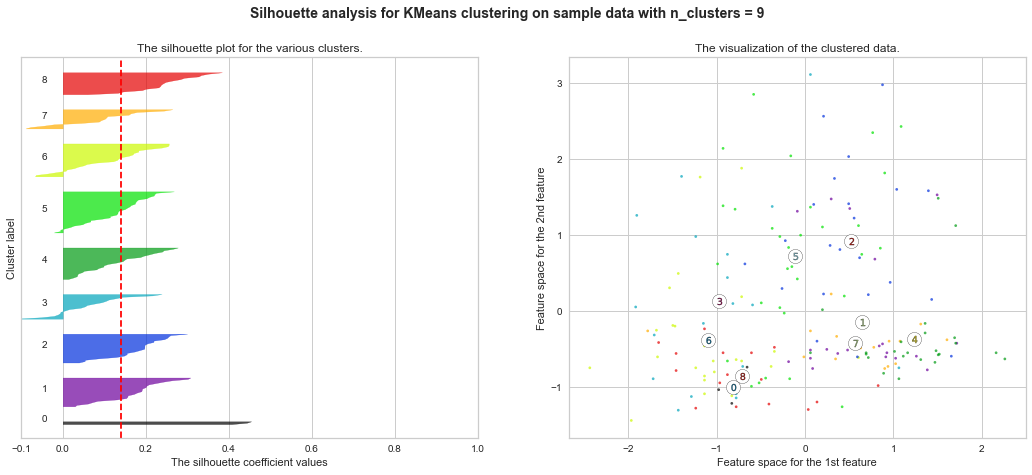

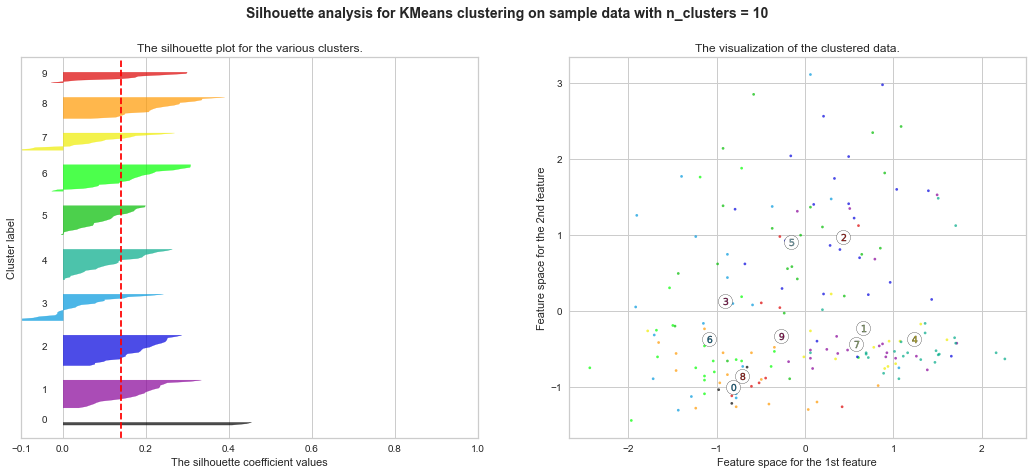

In [132]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [133]:
silhouette = []
for n_clusters in range(2,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2683134097105212)
For n_clusters = 3, silhouette score is 0.2848589191898987)
For n_clusters = 4, silhouette score is 0.25999709577125957)
For n_clusters = 5, silhouette score is 0.1963604023845689)
For n_clusters = 6, silhouette score is 0.19316198154241346)
For n_clusters = 7, silhouette score is 0.17218909510413002)
For n_clusters = 8, silhouette score is 0.12924146261245284)


To summarize the above plots, this is a plot calculating the silhouette_score for different values of n_clusters.

<AxesSubplot:xlabel='n_clusters', ylabel='silhouette_score'>

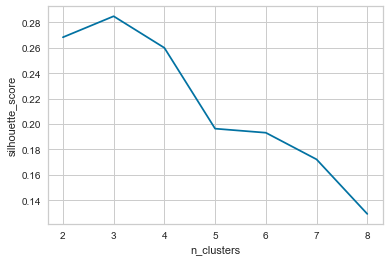

In [134]:
n_clusters = [x for x in range(2,9)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [136]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196


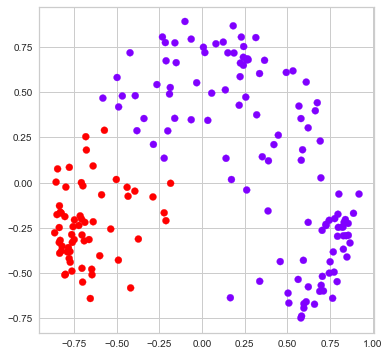

In [137]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering K=2
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

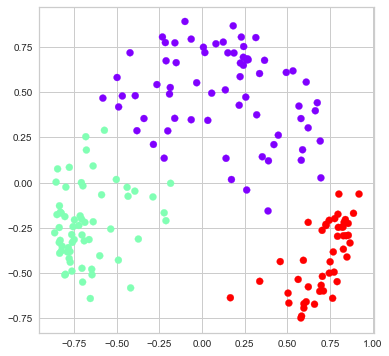

In [138]:
# Visualizing the clustering K=3
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

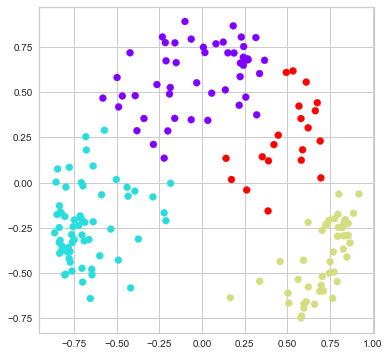

In [139]:
# Visualizing the clustering K=4
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

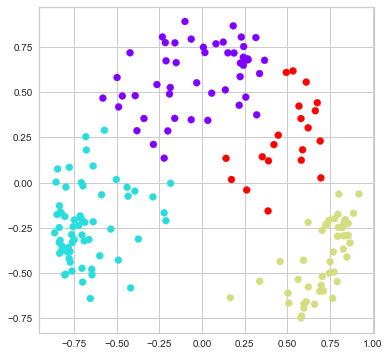

In [140]:
# Visualizing the clustering K=5
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')

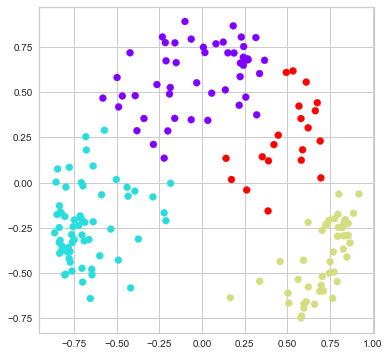

In [141]:
# Visualizing the clustering K=6
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')

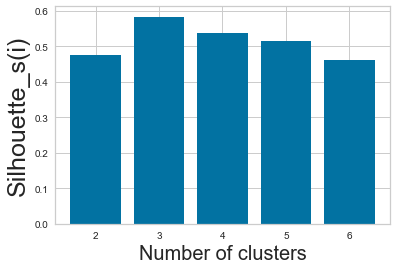

In [142]:
#We now determine the optimal number of clusters using silhouette Scores

k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette_s(i)', fontsize = 25)
plt.show()

The optimal number of clusters for the given data and clustering technique is 3.

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [143]:
#Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

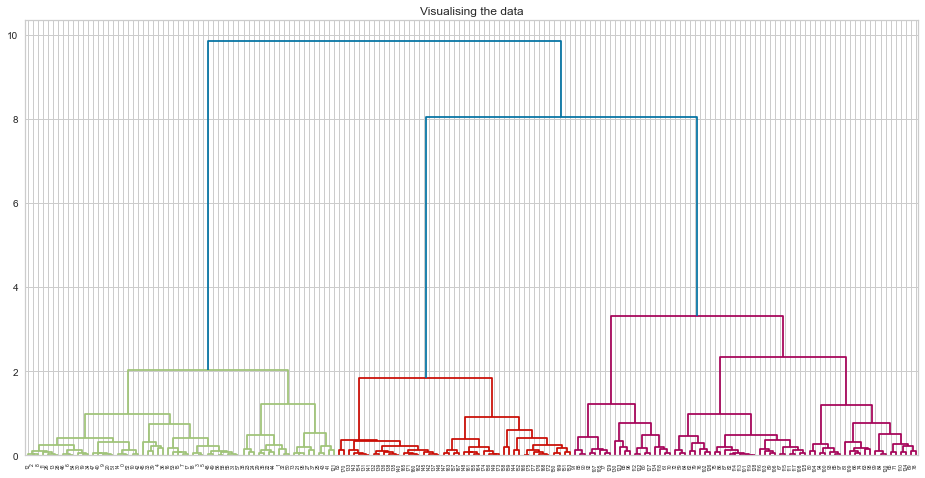

In [144]:
plt.figure(figsize =(16, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.